# Reading Images for Testing

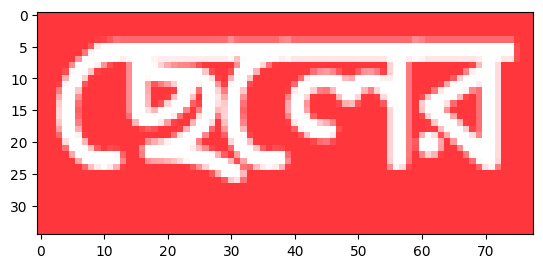

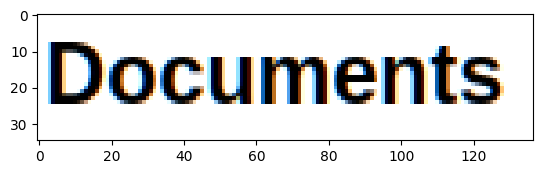

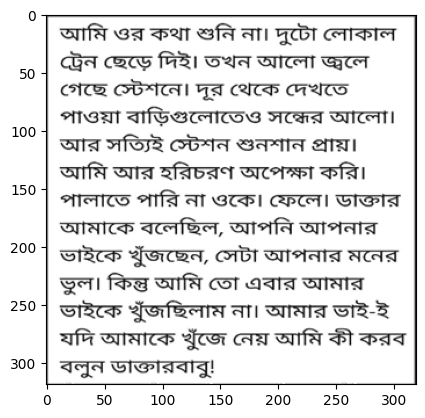

In [1]:
import cv2
from matplotlib import pyplot as plt
img_path="./images/test.png"
bn_crop=cv2.imread("./images/2.png")
en_crop=cv2.imread("./images/1.png")
img=cv2.imread(img_path)
plt.imshow(bn_crop)
plt.show()
plt.imshow(en_crop)
plt.show()
plt.imshow(img)
plt.show()


# Bangla Recognition

In [2]:
crops=[bn_crop]


In [3]:
from apsisocr import ApsisNet
bnocr=ApsisNet()
bnocr.infer(crops)

['ছেলের']

# English Recognition

In [4]:
crops=[en_crop]

In [5]:
from apsisocr import SVTRLCNet
enocr=SVTRLCNet()
enocr.infer(crops)

[INFO] fastdeploy/runtime/runtime.cc(273)::CreatePaddleBackend	Runtime initialized with Backend::PDINFER in Device::CPU.


W0924 19:24:52.847435 71189 analysis_config.cc:971] It is detected that mkldnn and memory_optimize_pass are enabled at the same time, but they are not supported yet. Currently, memory_optimize_pass is explicitly disabled


['Documents']

# Language classification

In [6]:
crops=[bn_crop,en_crop]

In [7]:
from apsisocr import DenseNet121BnEnClassifier
lang=DenseNet121BnEnClassifier()
lang.infer(crops)

['bn', 'en']

# Overall System

In [8]:
img_path="./images/test.png"

In [9]:
from apsisocr import ApsisOCR
ocr=ApsisOCR()
results=ocr(img_path)

#LOG     :Loaded Bangla Model
[INFO] fastdeploy/runtime/runtime.cc(273)::CreatePaddleBackend	Runtime initialized with Backend::PDINFER in Device::CPU.
#LOG     :Loaded English Model


[INFO] fastdeploy/runtime/runtime.cc(273)::CreatePaddleBackend	Runtime initialized with Backend::PDINFER in Device::CPU.
#LOG     :Loaded Paddle detector
#LOG     :Loaded Language classifier
[INFO] fastdeploy/runtime/runtime.cc(273)::CreatePaddleBackend	Runtime initialized with Backend::PDINFER in Device::CPU.


In [10]:
from pprint import pprint
pprint(results)

{'result': [{'lang': 'bn',
             'line_no': 0,
             'poly': [[238.0, 8.0], [303.0, 8.0], [303.0, 25.0], [238.0, 25.0]],
             'text': 'লোকাল',
             'word_no': 6},
            {'lang': 'bn',
             'line_no': 0,
             'poly': [[11.0, 6.0], [53.0, 6.0], [53.0, 25.0], [11.0, 25.0]],
             'text': 'আমি',
             'word_no': 0},
            {'lang': 'bn',
             'line_no': 0,
             'poly': [[57.0, 8.0], [86.0, 8.0], [86.0, 24.0], [57.0, 24.0]],
             'text': 'ওর',
             'word_no': 1},
            {'lang': 'bn',
             'line_no': 0,
             'poly': [[195.0, 6.0], [236.0, 6.0], [236.0, 29.0], [195.0, 29.0]],
             'text': 'দুটো',
             'word_no': 5},
            {'lang': 'bn',
             'line_no': 0,
             'poly': [[129.0, 6.0], [165.0, 6.0], [165.0, 25.0], [129.0, 25.0]],
             'text': 'শুনি',
             'word_no': 3},
            {'lang': 'bn',
             'line_no':

In [11]:
results.keys()

dict_keys(['result', 'text'])

In [12]:
results['text']

' আমি ওর কথা শুনি না। দুটো লোকাল\n ট্রেন ছেড়ে দিই। তখন আলো জ্বলে\n গেছে স্টেশনে। দূর থেকে দেখতে\n পাওয়া বাড়িগুলোতেও সন্ধের আলো।\n আর সত্যিই স্টেশন শুনশান প্রায়।\n আমি আর হরিচরণ অপেক্ষা করি।\n পালাতে পারি না ওকে। ফেলে। ডাক্তার\n আমাকে বলেছিল, আপনি আপনার\n ভাইকে খুঁজছেন, সেটা আপনার মনের\n ভুল। কিন্তু আমি তো এবার আমার\n ভাইকে খুঁজছিলাম না। আমার ভাই-ই\n যদি আমাকে খুঁজে নেয় আমি কী করব\n বলুন ডাক্তারবাবু!'

In [13]:
results["result"][0]

{'line_no': 0,
 'word_no': 6,
 'poly': [[238.0, 8.0], [303.0, 8.0], [303.0, 25.0], [238.0, 25.0]],
 'text': 'লোকাল',
 'lang': 'bn'}